## Case Study on risk analytics in banking and financial services : EDA Analysis

## Business Understanding:

### Understand the risk analytics in banking and financial services how the data is used to minimise the risk of losing the money when lending to the customers
### Lending Club is specialises in lending various types of loans to urban customers.
#### Lending Club has the data which contains the information about past loan applicants and whether they ‘defaulted’ or not.
#### Lending Club is an onine loan Marketplace which facilitates different types on loan like Personal Loan, Medical Loan, Financial Loan etc. The Borrowers can easily get the loan with lower interest rate.
#### When the Borrowers refuses to pay back the money will lead to Credit Loass and these Borrowers are labeeled as defaulters.

## Condition for Analysis:

### Once the company approves the loan, there are 3 possible scenarios described below:

    <b>Fully paid:<b> Applicant has fully paid the loan (the principal and the interest rate)

    <b>Current:<b> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    <b>Charged-off:<b> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

### We received the data for the analysis only with this 3 possible scenario to Analyse
### Identify the risky loan applicants using the past data, to reduce the amount of credit loss. Identification of such applicants using EDA is the aim of this case study

## Result Expected:

### The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

## File Details:
        - loan.csv - Past data record of Loan applicants who have Fully Paid, Current and Default
        - DataDictionary.xlsx - Provides detail about each field and how to intepret the data

## Data Understanding

In [169]:
#### importing the Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#### Import libraries for the plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
### Reading the Data from the csv file
Loan_Details = pd.read_csv("loan.csv")

In [171]:
### The file initial 5 rows are data are retrieved to verify the columns and the values
Loan_Details.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [172]:
#### Checking the number of rows and columns available in the data set
Loan_Details.shape

(39717, 111)

In [173]:
#### Checking the values in each field
Loan_Details.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [261]:
#### Verifying the field type for each of the column
Loan_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  float64       
 5   term                        39717 non-null  int32         
 6   int_rate                    39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  object        
 9   sub_grade                   39717 non-null  object        
 10  emp_title                   37258 non-null  object        
 11  emp_length                  39717 non-null  int32     

In [175]:
#### Checking the number of the null fields in the files
Loan_Details.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [176]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(Loan_Details.isnull().sum()/len(Loan_Details.index)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

### Since many columns has no data at all, we can notice 100% is displayed. So removing the column which doesnt have any data at all

## Data Cleaning

In [177]:
### The columns which has all 100% value missing will not help in any analysis. So reducing the columns which doesnt have data
Loan_Details = Loan_Details.dropna(how='all', axis=1)

In [178]:
### Checking the number of rows and columns after dropping all the values
Loan_Details.shape

(39717, 57)

In [179]:
### Checking the field values
Loan_Details.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [180]:
### Checking the Top5 records
Loan_Details.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [181]:
#Loan_Details.to_csv("D:/Upgrad/Course1_Statistics Essentials/Case Study/AfterClean.csv", index = False)

In [182]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(Loan_Details.isnull().sum()/len(Loan_Details.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [183]:
### The columns mths_since_last_record and next_pymnt_d has more than 90% data not present. Hence removing this columns
Loan_Details = Loan_Details.drop('mths_since_last_record', axis = 1)
Loan_Details = Loan_Details.drop('next_pymnt_d', axis = 1)

##### few columns that needs data cleaning are given below:
##### 'int_rate' column has % symbol at the end and the field is displayed as object
##### 'emp_length' column is displayed with the values like <1 years +7 years, For better calculation, removing the values year, years, <, + symbol
##### 'Term' field is having the months value in it, removing the months and making the field value as integer
##### The date fields are all displayed as object. 'issue_d','last_credit_pull_d','last_pymnt_d','Next_pymnt_d'
##### 'issue_d' we need the year and month seperated for our analysis
##### 'revol_util' column has % symbol at the end and the field is displayed as object
##### Making all the above changes in the data cleaning

In [184]:
###Verifying the data type of the fields
Loan_Details[['int_rate','emp_length','issue_d','last_credit_pull_d','last_pymnt_d','revol_util','revol_bal']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   int_rate            39717 non-null  object
 1   emp_length          38642 non-null  object
 2   issue_d             39717 non-null  object
 3   last_credit_pull_d  39715 non-null  object
 4   last_pymnt_d        39646 non-null  object
 5   revol_util          39667 non-null  object
 6   revol_bal           39717 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 2.1+ MB


In [185]:
### Checking the null values in this fields
Loan_Details[['int_rate','emp_length','issue_d','last_credit_pull_d','last_pymnt_d','revol_util','revol_bal']].isnull().sum()

int_rate                 0
emp_length            1075
issue_d                  0
last_credit_pull_d       2
last_pymnt_d            71
revol_util              50
revol_bal                0
dtype: int64

In [186]:
### Removing the '%' symbol in the 'int_rate' column and converting it to the float
Loan_Details['int_rate'] = Loan_Details['int_rate'].apply(lambda x: x.strip('%'))
Loan_Details['int_rate'] = Loan_Details['int_rate'].astype('float64')

In [187]:
Loan_Details['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
17.54      1
17.44      1
20.52      1
24.59      1
17.34      1
Name: int_rate, Length: 371, dtype: int64

In [188]:
#### removing the values year, years, <, + symbol from the 'emp_length' field
Loan_Details['emp_length'] = Loan_Details['emp_length'].astype(str).str.lstrip('< ').str.rstrip('+ years').str.rstrip('year').str.rstrip('years')

In [189]:
### Checking the values which is missing in the emp_length field
Loan_Details['emp_length'].value_counts()

10     8879
1      7823
2      4388
3      4095
4      3436
5      3282
6      2229
7      1773
8      1479
9      1258
nan    1075
Name: emp_length, dtype: int64

In [190]:
#### Verifying the nan records
Loan_Details[Loan_Details['emp_length']=='nan']

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
168,1067644,1302032,2500,2500,2500.00000,36 months,7.51,77.78,A,A3,...,77.78,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
323,1058717,1290516,18000,18000,18000.00000,60 months,17.58,452.98,D,D4,...,6909.59,Sep-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
394,1064582,1298394,4000,4000,4000.00000,36 months,11.71,132.31,B,B3,...,3658.15,May-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
422,1064366,1298164,1000,1000,1000.00000,36 months,14.65,34.50,C,C3,...,34.50,Jun-12,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0
439,1063912,1296491,8250,8250,8250.00000,36 months,7.51,256.67,A,A3,...,278.92,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,480410,610728,10000,10000,9975.00000,36 months,14.22,342.85,C,C5,...,9431.97,Jul-10,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
32608,480216,610335,3700,3700,3700.00000,36 months,14.22,126.86,C,C5,...,132.70,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
32621,479954,609955,10000,10000,9731.17513,36 months,14.22,342.85,C,C5,...,342.85,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
32631,479836,609803,6000,6000,6000.00000,36 months,12.73,201.40,C,C1,...,222.95,Feb-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [191]:
### Replacing the nan values with 0
Loan_Details['emp_length'] = Loan_Details['emp_length'].replace('nan','0')

In [192]:
Loan_Details['emp_length'].value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64

In [193]:
#### Converting the emp_length column to the integer type
Loan_Details['emp_length'] = Loan_Details['emp_length'].astype('int32')

In [194]:
#### Removing the months value from the Term column and converting it to integer data type
Loan_Details['term'] = Loan_Details['term'].apply(lambda x: x.strip(' months'))
Loan_Details['term'] = Loan_Details['term'].astype('int32')

In [195]:
#### Verifying the values in the Term field
Loan_Details['term'].value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [196]:
#### Converting all the date columns to Date data type
Loan_Details['issue_d'] = pd.to_datetime(Loan_Details['issue_d'], format='%b-%y')
Loan_Details['last_credit_pull_d'] = pd.to_datetime(Loan_Details['last_credit_pull_d'], format='%b-%y')
Loan_Details['last_pymnt_d'] = pd.to_datetime(Loan_Details['last_pymnt_d'], format='%b-%y')
#### Verifying the fields after the convertion
Loan_Details[['issue_d','last_credit_pull_d','last_pymnt_d']].describe()

,issue_d,last_credit_pull_d,last_pymnt_d
count,39717,39715,39646
unique,55,106,101
top,2011-12-01 00:00:00,2016-05-01 00:00:00,2016-05-01 00:00:00
freq,2260,10308,1256
first,2007-06-01 00:00:00,2007-05-01 00:00:00,2008-01-01 00:00:00
last,2011-12-01 00:00:00,2016-05-01 00:00:00,2016-05-01 00:00:00


In [197]:
#### Verifying the fields after the convertion
Loan_Details[['issue_d','last_credit_pull_d','last_pymnt_d']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             39717 non-null  datetime64[ns]
 1   last_credit_pull_d  39715 non-null  datetime64[ns]
 2   last_pymnt_d        39646 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 931.0 KB


In [198]:
Loan_Details.issue_d.value_counts()

2011-12-01    2260
2011-11-01    2223
2011-10-01    2114
2011-09-01    2063
2011-08-01    1928
2011-07-01    1870
2011-06-01    1827
2011-05-01    1689
2011-04-01    1562
2011-03-01    1443
2011-01-01    1380
2011-02-01    1297
2010-12-01    1267
2010-10-01    1132
2010-11-01    1121
2010-07-01    1119
2010-09-01    1086
2010-08-01    1078
2010-06-01    1029
2010-05-01     920
2010-04-01     827
2010-03-01     737
2010-02-01     627
2009-11-01     602
2009-12-01     598
2010-01-01     589
2009-10-01     545
2009-09-01     449
2009-08-01     408
2009-07-01     374
2009-06-01     356
2009-05-01     319
2009-04-01     290
2009-03-01     276
2009-02-01     260
2009-01-01     239
2008-03-01     236
2008-12-01     223
2008-11-01     184
2008-02-01     174
2008-01-01     171
2008-04-01     155
2008-10-01      96
2007-12-01      85
2008-07-01      83
2008-05-01      71
2008-08-01      71
2008-06-01      66
2007-10-01      47
2007-11-01      37
2007-08-01      33
2008-09-01      32
2007-07-01  

In [199]:
### Removing the '%' symbol in the 'int_rate' column and converting it to the float
Loan_Details['revol_util'] = Loan_Details['revol_util'].astype(str).str.replace('%','')
Loan_Details['revol_util'] = Loan_Details['revol_util'].astype('float64')

In [200]:
Loan_Details['revol_util'].value_counts()

0.00     977
0.20      63
63.00     62
40.70     58
66.70     58
        ... 
70.94      1
8.49       1
77.63      1
10.17      1
24.66      1
Name: revol_util, Length: 1089, dtype: int64

In [201]:
Loan_Details['revol_util'].isnull().sum()

50

In [202]:
Loan_Details['revol_util'].describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

<AxesSubplot:>

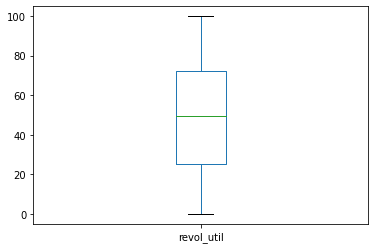

In [203]:
### To check whether we have outliers.. It is clear that there is no outliers.
Loan_Details['revol_util'].plot.box()

In [204]:
Loan_Details.shape

(39717, 55)

## Data Analysis

##### Now that the data is cleaned. Lets look into the different Univariate and Bivariate Analysis

In [205]:
### Since our Target Variable is the Loan Status. Lets look at the loan staus field
Loan_Details.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

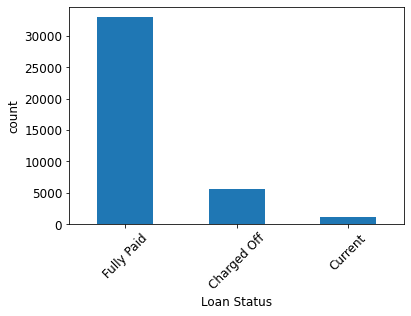

In [206]:
### Loan status lies in the 3 categories. Lets plot a bar
Loan_Details.loan_status.value_counts().plot.bar()
plt.xticks(size=12,rotation = 45)
plt.xlabel('Loan Status',size=12)
plt.yticks(size=12)
plt.ylabel('count', size=12)
plt.show()

#### Since the 'Current' loan status cannot not be added in the analysis, Lets drop this column value 

In [207]:
#### Taking a dataframee to have only Fully Paid and charged off columns
loan_Verify=Loan_Details[(Loan_Details.loan_status.isin(['Fully Paid','Charged Off']))]

In [208]:
#### Verify the shape of the column
loan_Verify.shape

(38577, 55)

In [209]:
loan_Verify.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,161.03,2016-01-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [210]:
#### Lets convert the Fully Paid and Charged Off column values to numeric value for plotting.
#### Taking Fully Paid field value as 0 and Charged Off as 1
loan_Verify['Loan_Status_Value']=loan_Verify.apply(lambda x: 0 if x['loan_status']=='Fully Paid' else 1, axis=1 )

In [211]:
loan_Verify.shape

(38577, 56)

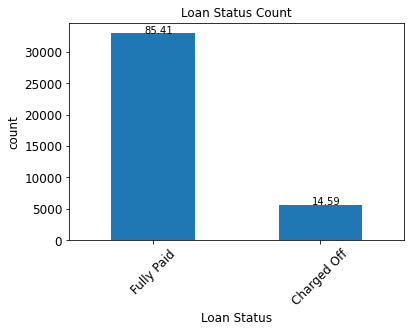

In [212]:
### Ploting the graph for the 2 types of Loan Status
graph = loan_Verify.loan_status.value_counts().plot.bar()

plt.xticks(size=12,rotation = 45)
plt.xlabel('Loan Status',size=12)
plt.yticks(size=12)
plt.ylabel('count', size=12)
plt.title('Loan Status Count')


for p in graph.patches:
        graph.annotate('{:.2f}'.format(100 * p.get_height()/len(loan_Verify)), (p.get_x()+ p.get_width() / 2 - 0.05, p.get_y() + p.get_height()),
                    color= 'black')

##### There of 85.41% of data with Fully Paid details and charged off is 14.59%

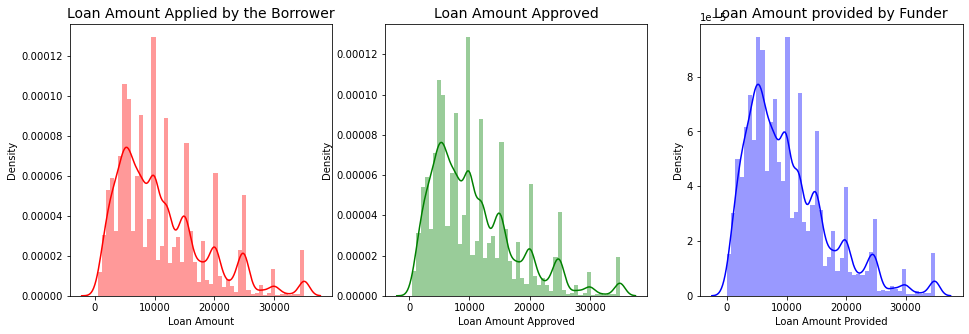

In [213]:
### Nows lets analyse the fields - Loan_amnt, funded_amnt, funded_amnt_inv by chart

plt.figure(figsize=(16,5))
plt.subplot(1, 3, 1)
sns.distplot(loan_Verify.loan_amnt, color='r')
plt.xlabel("Loan Amount")
plt.title("Loan Amount Applied by the Borrower", fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(loan_Verify.funded_amnt, color='g')
plt.xlabel("Loan Amount Approved")
plt.title("Loan Amount Approved", fontsize=14)

plt.subplot(1, 3, 3)
sns.distplot(loan_Verify.funded_amnt_inv, color='b')
plt.xlabel("Loan Amount Provided")
plt.title("Loan Amount provided by Funder", fontsize=14)
plt.show()

#### Although the 'loan_amnt' and the 'funded_amnt' graph looks similar, we can see little different in the 'funded_amnt_inv' looks little different. The peak looks different in the initial range of 0 to 10000

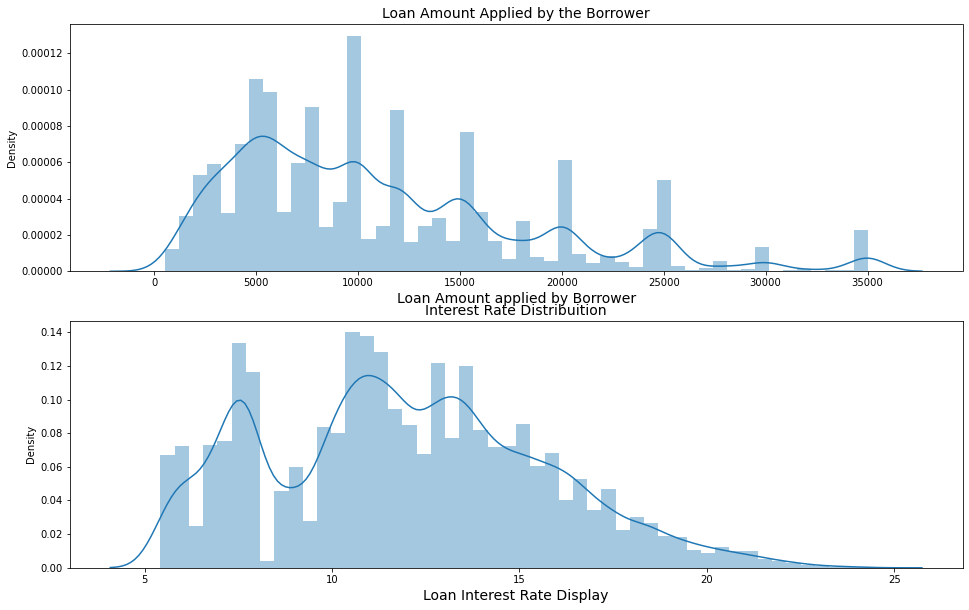

In [214]:
### Lets check the Loan amount and the interest rate distribution

plt.figure(figsize=(16,10))

# Loan Amt plot
plt.subplot(2,1,1)
sns.distplot(loan_Verify["loan_amnt"])
plt.xlabel("Loan Amount applied by Borrower", fontsize=14)
plt.title("Loan Amount Applied by the Borrower", fontsize=14)

## Interest plot
plt.subplot(2,1,2)

sns.distplot(loan_Verify["int_rate"])
plt.xlabel("Loan Interest Rate Display", fontsize=14)
plt.title("Interest Rate Distribuition", fontsize=14)

plt.show()

#### We can notice from the interest rate graph that maximum interest rate is 25% and numer of loans in the interest rate of 20-25 is less. There is more records in the interest rate between 10-15% interest rate

Text(0, 0.5, 'count')

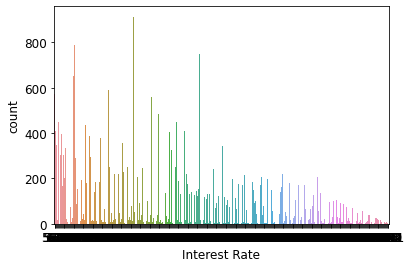

In [215]:
### Lets see interest rate field sepeartely. At what point of interest rate more loans are taken
sns.countplot("int_rate", data=loan_Verify)
plt.xticks(size=12)
plt.xlabel('Interest Rate',size=12)
plt.yticks(size=12)
plt.ylabel('count', size=12)


#### The bar chart is not clear since many values are randomly distributed. 
#### After observing the data again, understood that there are decimal number range which is making much of a difference. Let us round the interest value to the round number to help view the graph properly

In [216]:
loan_Verify['rounded_interest'] = loan_Verify.int_rate.round(0).astype(int)

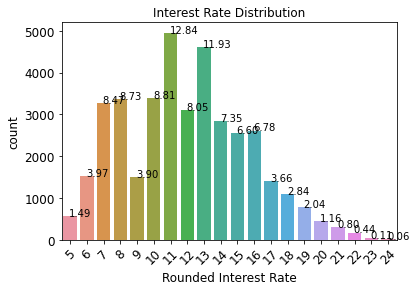

In [217]:
#### Plotting the interest rate agin after rounding it off.
graph = sns.countplot("rounded_interest", data=loan_Verify)
plt.title('Interest Rate Distribution')
plt.xticks(size=12, rotation=45)
plt.xlabel('Rounded Interest Rate',size=12)
plt.yticks(size=12)
plt.ylabel('count', size=12)
for p in graph.patches:
        graph.annotate('{:.2f}'.format(100 * p.get_height()/len(loan_Verify)), (p.get_x()+ p.get_width() / 2 - 0.05, p.get_y() + p.get_height()),
                    color= 'black')

#### The bar chart is now clear. We can see that more loans are taken in the interest rate of 11(12.84%) followed by 13(11.93%). Lets check the interest rate in boxplot as well

<AxesSubplot:>

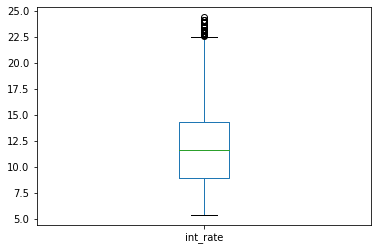

In [218]:
loan_Verify.int_rate.plot.box()

#### We can see that the median/50% lies at the 11 - 12.5% and very few values as outliers after 22.5 to 25%

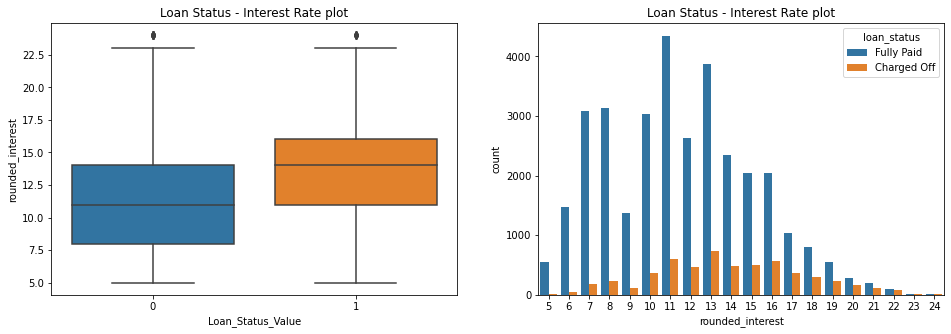

In [219]:
### Lets check the Loan status range which lies in the interest rate wounded off values.
plt.figure(figsize=(16,5))

# Loan status with the interest Rate plot
plt.subplot(1,2,1)
sns.boxplot(x="Loan_Status_Value", y="rounded_interest", data=loan_Verify)
plt.title('Loan Status - Interest Rate plot')
plt.subplot(1,2,2)
sns.countplot(data=loan_Verify,x='rounded_interest',hue='loan_status')
plt.title('Loan Status - Interest Rate plot')
plt.show()


##### Lets split the data for Fully Paid and ChargedOff in seperate data frame to get the proper % value of comparison.
##### Because we have fully paid counts more than the charged off. The % of data distribution would not be proper

In [220]:
#### Taking a dataframee to have only Fully Paid and charged off columns
Fully_Paid_Loan=loan_Verify[(loan_Verify.loan_status.isin(['Fully Paid']))]
ChargedOff_Loan=loan_Verify[(loan_Verify.loan_status.isin(['Charged Off']))]

Text(0.5, 1.0, 'The Charged Off Loan with the rounded Interest Distribution')

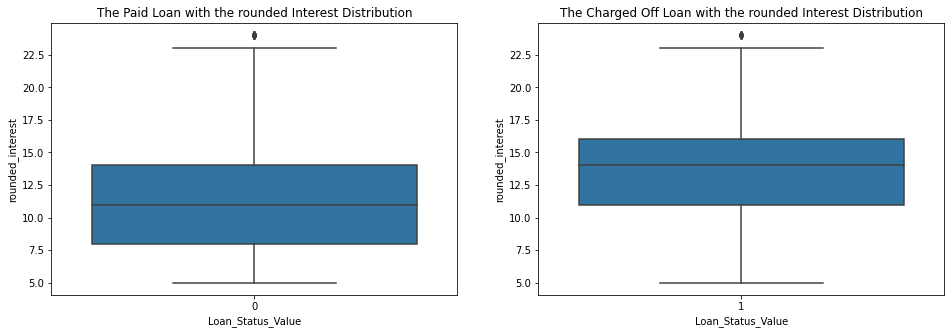

In [221]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.boxplot(x="Loan_Status_Value", y="rounded_interest", data=Fully_Paid_Loan)
plt.title('The Paid Loan with the rounded Interest Distribution')
plt.subplot(1,2,2)
sns.boxplot(x="Loan_Status_Value", y="rounded_interest", data=ChargedOff_Loan)
plt.title('The Charged Off Loan with the rounded Interest Distribution')


Text(0.5, 1.0, 'The Paid Loan with the rounded Interest Distribution')

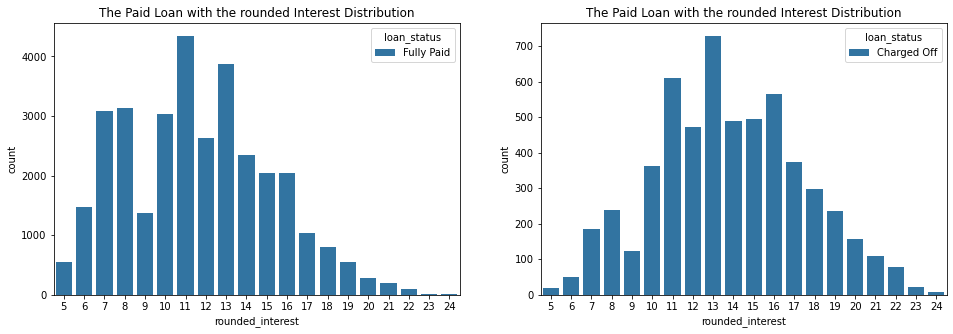

In [222]:
plt.figure(figsize=(16,5))
# Loan status with the interest Rate plot
plt.subplot(1,2,1)
sns.countplot(data=Fully_Paid_Loan,x='rounded_interest',hue='loan_status')
plt.title('The Paid Loan with the rounded Interest Distribution')
plt.subplot(1,2,2)
sns.countplot(data=ChargedOff_Loan,x='rounded_interest',hue='loan_status')
plt.title('The Paid Loan with the rounded Interest Distribution')


##### We can see that the charged off loan is high in the interest rate around 11 to 16

##### Lets see the graphical display of how many loans are provided in an year

In [223]:
### Taking the year field seperate from the issue date so that we can analyse the number of loans given in an year
loan_Verify['year'] =loan_Verify['issue_d'].dt.year
Fully_Paid_Loan['year'] =Fully_Paid_Loan['issue_d'].dt.year
ChargedOff_Loan['year'] =ChargedOff_Loan['issue_d'].dt.year

Text(0, 0.5, 'Average loan amount borrowers asked')

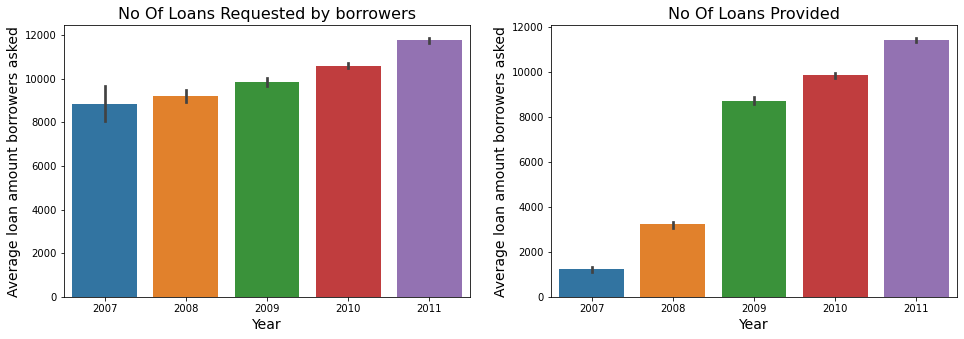

In [224]:
### Plotting a bar plot for the issue year and the loan amount
plt.figure(figsize=(16,5))
# Loan amount with the year plot
plt.subplot(1,2,1)
sns.barplot('year', 'loan_amnt', data=loan_Verify)
plt.title('No Of Loans Requested by borrowers', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount borrowers asked', fontsize=14)
plt.subplot(1,2,2)
sns.barplot('year', 'funded_amnt_inv', data=loan_Verify)
plt.title('No Of Loans Provided', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount borrowers asked', fontsize=14)

##### Its Clear that the Number of Loans Requested is more in the year 2011. We can also see clear spike in the Funded amount as well. In the year 2007, we can see that not all the Loans requested (loan_amnt) is provided(funded_amnt_inv).  It is almost matching with the number of loans requested in the year 2011.
##### The above graph didnt clear mention about paid and Charged off loan. Lets split the same based on Fully Paid and chaged off

Text(0, 0.5, 'Average loan amount borrowers asked')

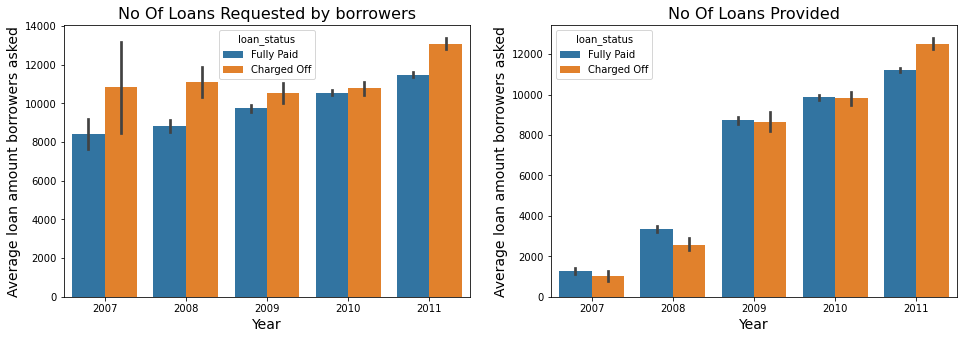

In [225]:
### Plotting a bar plot for the issue year and the loan amount
plt.figure(figsize=(16,5))
# Loan amount with the year plot
plt.subplot(1,2,1)
sns.barplot('year', 'loan_amnt', hue='loan_status', data=loan_Verify)
plt.title('No Of Loans Requested by borrowers', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount borrowers asked', fontsize=14)
plt.subplot(1,2,2)
sns.barplot('year', 'funded_amnt_inv', hue='loan_status', data=loan_Verify)
plt.title('No Of Loans Provided', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount borrowers asked', fontsize=14)


In [226]:
loanStatus_term = pd.pivot_table(data=loan_Verify, index='term', columns='Loan_Status_Value', values='loan_amnt', 
               aggfunc="count")
loanStatus_term['TotalperYear']= loanStatus_term[0]+loanStatus_term[1]
loanStatus_term['%Charged Off'] = loanStatus_term[1]/loanStatus_term['TotalperYear']*100
loanStatus_term['%FullyPaid'] = loanStatus_term[0]/loanStatus_term['TotalperYear']*100
loanStatus_term.head()

Loan_Status_Value,0,1,TotalperYear,%Charged Off,%FullyPaid
term,,,,,
36,25869,3227,29096,11.090872,88.909128
60,7081,2400,9481,25.313785,74.686215


<Figure size 864x864 with 0 Axes>

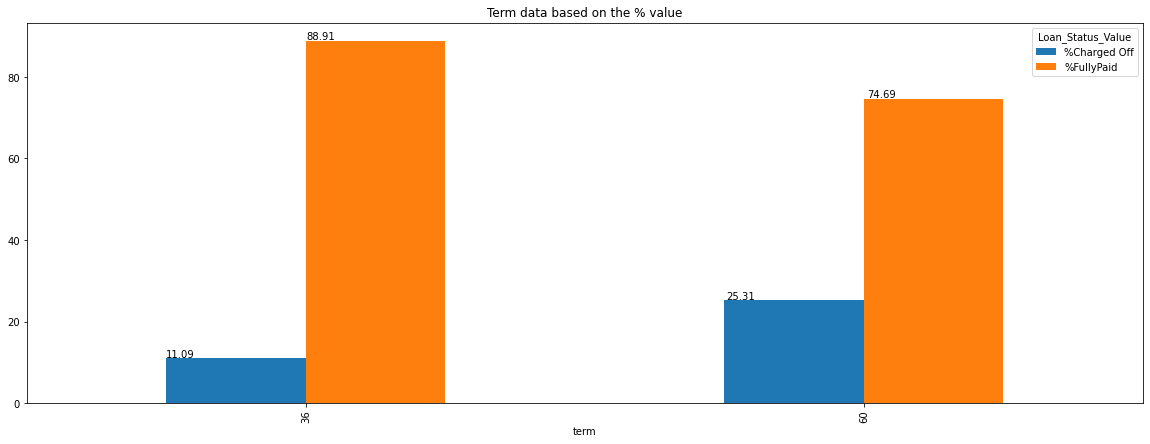

In [262]:
plt.figure(figsize=(12,12))
graph = loanStatus_term[['%Charged Off','%FullyPaid']].plot(kind="bar",figsize=[20,7])
plt.title('Term data based on the % value')
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#### As we can see, in the plot above, when loan tenure increases from 36 to 60 months, there is an increase in the percentage of charged off loans

In [228]:
### Creating seperate dataframe for the loan status_year and calculated % of default in the record.
loanStatus_year = pd.pivot_table(data=loan_Verify, index='year', columns='loan_status', values='loan_amnt', 
               aggfunc=np.sum)
loanStatus_year['TotalperYear']= loanStatus_year['Charged Off']+loanStatus_year['Fully Paid']
loanStatus_year['%Charged Off'] = loanStatus_year['Charged Off']/loanStatus_year['TotalperYear']*100
loanStatus_year['%FullyPaid'] = loanStatus_year['Fully Paid']/loanStatus_year['TotalperYear']*100
loanStatus_year.head()

loan_status,Charged Off,Fully Paid,TotalperYear,%Charged Off,%FullyPaid
year,,,,,
2007,488400,1730875,2219275,22.007187,77.992813
2008,2739600,11650675,14390275,19.037857,80.962143
2009,6256475,40179850,46436325,13.473235,86.526765
2010,16001200,106049000,122050200,13.110343,86.889657
2011,42625700,198439325,241065025,17.682242,82.317758


<Figure size 864x864 with 0 Axes>

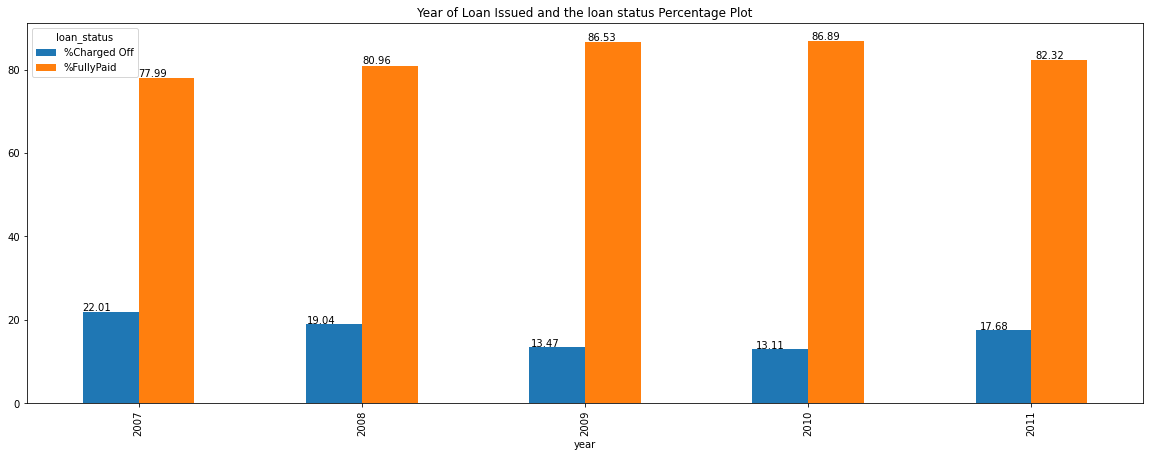

In [229]:
plt.figure(figsize=(12,12))
graph = loanStatus_year[['%Charged Off','%FullyPaid']].plot(kind="bar",figsize=[20,7])
plt.title('Year of Loan Issued and the loan status Percentage Plot')
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

##### In the year 2011, the 'funded_amnt_inv' distribution against 'Year' shows that charged off loan is more than the paid ones in the year 2011

In [230]:
### Home ownership
loan_Verify.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='Loan_Status_Value'>

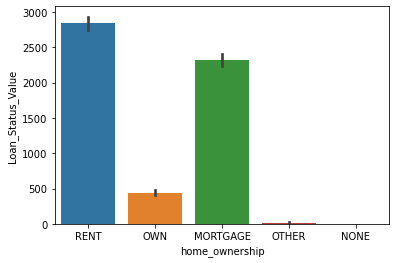

In [231]:
sns.barplot(data = loan_Verify, x="home_ownership", y ="Loan_Status_Value", estimator =np.sum)

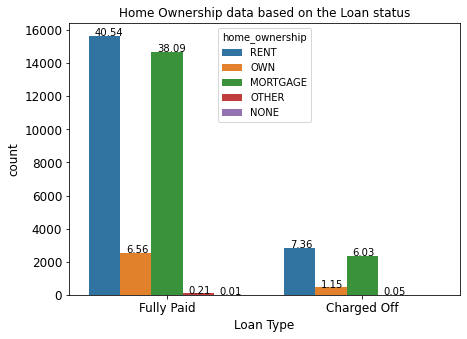

In [232]:
plt.figure(figsize=(7,5))
graph= sns.countplot(x="loan_status", hue="home_ownership", data=loan_Verify)
plt.xticks(size=12)
plt.xlabel('Loan Type',size=12)
plt.yticks(size=12)
plt.ylabel('count', size=12)
plt.title('Home Ownership data based on the Loan status', size=12)
for p in graph.patches:
        graph.annotate('{:.2f}'.format(100 * p.get_height()/len(loan_Verify)), (p.get_x()+ p.get_width() / 2 - 0.05, p.get_y() + p.get_height()),
                    color= 'black')


##### Clearly people take more loans when their property is rented or mortgaged. When considering defaults, occurence is more for loan type rent and mortgage

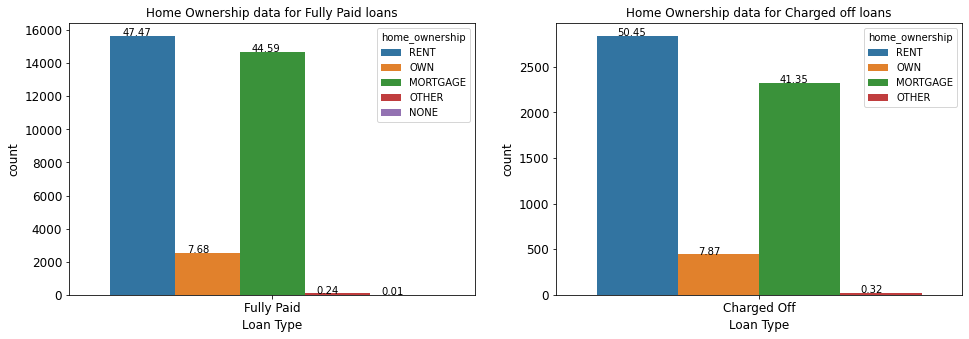

In [233]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plot1= sns.countplot(x="loan_status", hue="home_ownership", data=Fully_Paid_Loan)
plt.xticks(size=12)
plt.xlabel('Loan Type',size=12)
plt.yticks(size=12)
plt.ylabel('count', size=12)
plt.title("Home Ownership data for Fully Paid loans")
for p in plot1.patches:
        plot1.annotate('{:.2f}'.format(100 * p.get_height()/len(Fully_Paid_Loan)), (p.get_x()+ p.get_width() / 2 - 0.05, p.get_y() + p.get_height()),
                    color= 'black')
plt.subplot(1,2,2)
plot2= sns.countplot(x="loan_status", hue="home_ownership", data=ChargedOff_Loan)
plt.xticks(size=12)
plt.xlabel('Loan Type',size=12)
plt.yticks(size=12)
plt.ylabel('count', size=12)
plt.title("Home Ownership data for Charged off loans")
for p in plot2.patches:
        plot2.annotate('{:.2f}'.format(100 * p.get_height()/len(ChargedOff_Loan)), (p.get_x()+ p.get_width() / 2 - 0.05, p.get_y() + p.get_height()),
                    color= 'black')

#### In ChargedOff loan type, people owning the own house is less. People are more in Rent/Mortgage House status

In [234]:
#### Lets check the Loan Verification status
loan_Verify.verification_status.value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

Text(0.5, 1.0, 'Loan Verification data')

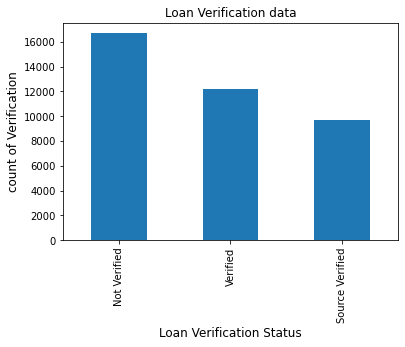

In [235]:
loan_Verify.verification_status.value_counts().plot.bar()
plt.xlabel('Loan Verification Status',size=12)
plt.ylabel('count of Verification', size=12)
plt.title("Loan Verification data")

##### Lets verify whether the Verification status has impact in the charged off loan

Text(0, 0.5, 'count')

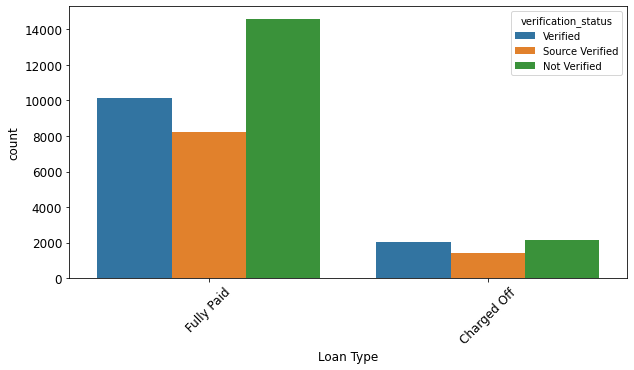

In [236]:
plt.figure(figsize=(10,5))
sns.countplot(x="loan_status", hue="verification_status", data=loan_Verify)
plt.xticks(size=12, rotation=45)
plt.xlabel('Loan Type',size=12)
plt.yticks(size=12)
plt.ylabel('count', size=12)


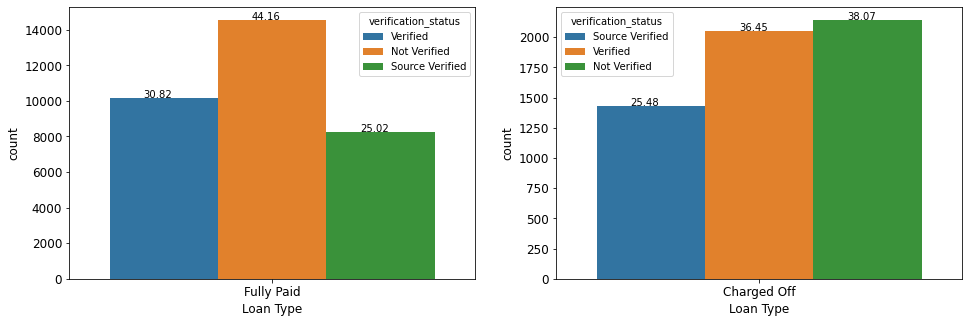

In [237]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plot1 = sns.countplot(x="loan_status", hue="verification_status", data=Fully_Paid_Loan)
plt.xticks(size=12)
plt.xlabel('Loan Type',size=12)
plt.yticks(size=12)
plt.ylabel('count', size=12)
for p in plot1.patches:
        plot1.annotate('{:.2f}'.format(100 * p.get_height()/len(Fully_Paid_Loan)), (p.get_x()+ p.get_width() / 2 - 0.05, p.get_y() + p.get_height()),
                    color= 'black')
plt.subplot(1,2,2)
plot2 = sns.countplot(x="loan_status", hue="verification_status", data=ChargedOff_Loan)
plt.xticks(size=12)
plt.xlabel('Loan Type',size=12)
plt.yticks(size=12)
plt.ylabel('count', size=12)
for p in plot2.patches:
        plot2.annotate('{:.2f}'.format(100 * p.get_height()/len(ChargedOff_Loan)), (p.get_x()+ p.get_width() / 2 - 0.05, p.get_y() + p.get_height()),
                    color= 'black')

##### Verified and not Verified source value has less impact in the charged off loans. There is less than 2% difference is found 

In [238]:
### Lets now Analyse the Data based on term
loan_Verify.groupby(['term'])['loan_status'].value_counts()

term  loan_status
36    Fully Paid     25869
      Charged Off     3227
60    Fully Paid      7081
      Charged Off     2400
Name: loan_status, dtype: int64

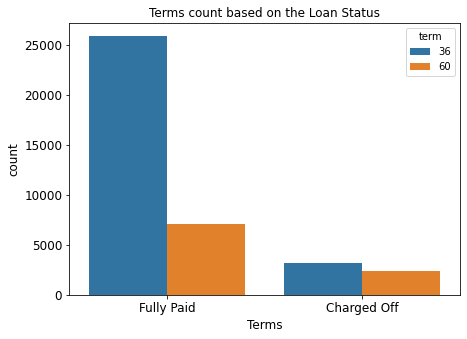

In [239]:
### To check Term
plt.figure(figsize=(7,5))
sns.countplot(x="loan_status", hue="term", data=loan_Verify)
plt.xticks(size=12)
plt.xlabel('Terms',size=12)
plt.yticks(size=12)
plt.ylabel('count', size=12)
plt.title('Terms count based on the Loan Status', size=12)
plt.show()

#### Charged Off loan is more in the 60 months

#### Lets now check whether the annual income of a person has any difference in the Charged off loan status

In [240]:
loan_Verify['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

##### The Annual income of the people range from 4000 to 6000000. Let take Low, Medium and High Range of annual income
##### Low less than 20000 , Medium not more than mean value ie. 68000 and High above 68000

In [241]:
loan_Verify['annual_inc_value']=loan_Verify.apply(lambda x: 'Low' if x['annual_inc']<= 20000 
                                                  else ('Medium' if (x['annual_inc']> 20000 and x['annual_inc']<= 68000) else 'High'), axis=1 )
loan_Verify.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Loan_Status_Value,rounded_interest,year,annual_inc_value
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,INDIVIDUAL,0,0.0,0,0.0,0.0,0,11,2011,Medium
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,INDIVIDUAL,0,0.0,0,0.0,0.0,1,15,2011,Medium
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,INDIVIDUAL,0,0.0,0,0.0,0.0,0,16,2011,Low
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,INDIVIDUAL,0,0.0,0,0.0,0.0,0,13,2011,Medium
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,INDIVIDUAL,0,0.0,0,0.0,0.0,0,8,2011,Medium


In [242]:
Fully_Paid_Loan['annual_inc_value']=Fully_Paid_Loan.apply(lambda x: 'Low' if x['annual_inc']<= 20000 
                                                  else ('Medium' if (x['annual_inc']> 20000 and x['annual_inc']<= 68000) else 'High'), axis=1 )
ChargedOff_Loan['annual_inc_value']=ChargedOff_Loan.apply(lambda x: 'Low' if x['annual_inc']<= 20000 
                                                  else ('Medium' if (x['annual_inc']> 20000 and x['annual_inc']<= 68000) else 'High'), axis=1 )


<AxesSubplot:xlabel='annual_inc_value', ylabel='loan_amnt'>

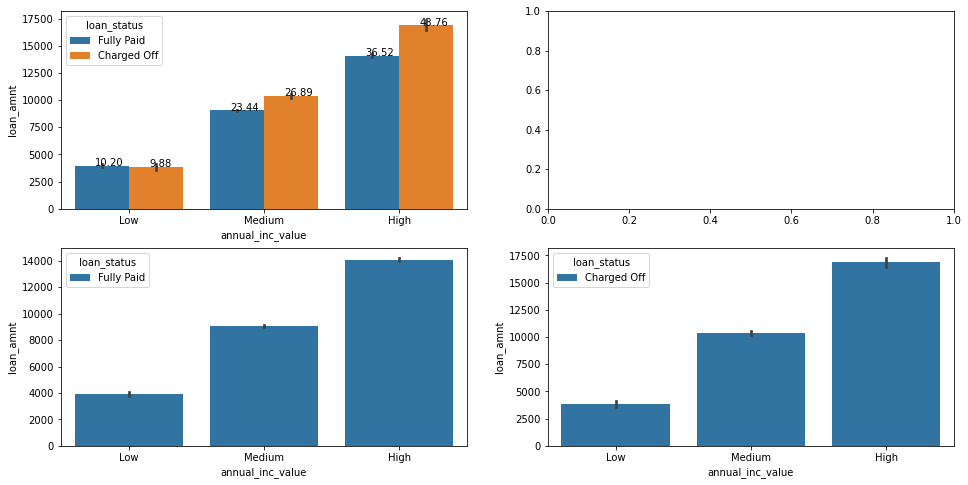

In [243]:
fig, ((plot1,plot2), (plot3, plot4))= plt.subplots(nrows=2, ncols=2, figsize=(16,8))
sns.barplot(data=loan_Verify,x='annual_inc_value',y='loan_amnt',hue='loan_status',ax=plot1,order=('Low','Medium','High'))
for p in plot1.patches:
        plot1.annotate('{:.2f}'.format(100 * p.get_height()/len(loan_Verify)), (p.get_x()+ p.get_width() / 2 - 0.05, p.get_y() + p.get_height()),
                    color= 'black')
sns.barplot(data=Fully_Paid_Loan,x='annual_inc_value',y='loan_amnt',hue='loan_status',ax=plot3,order=('Low','Medium','High'))
sns.barplot(data=ChargedOff_Loan,x='annual_inc_value',y='loan_amnt',hue='loan_status',ax=plot4,order=('Low','Medium','High'))


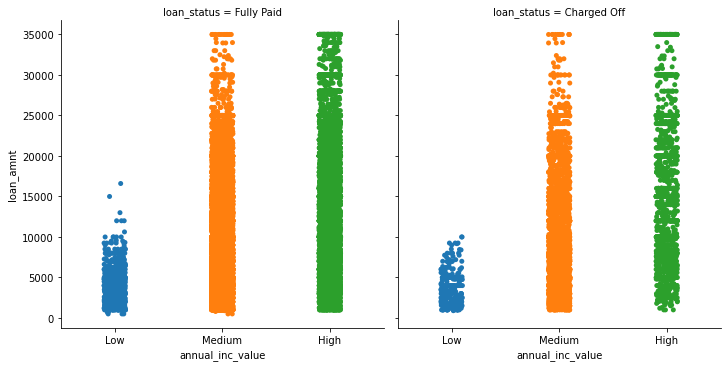

In [244]:

sns.catplot(data=loan_Verify,x='annual_inc_value',y='loan_amnt',col='loan_status',order=('Low','Medium','High'))

Text(0, 0.5, 'Count')

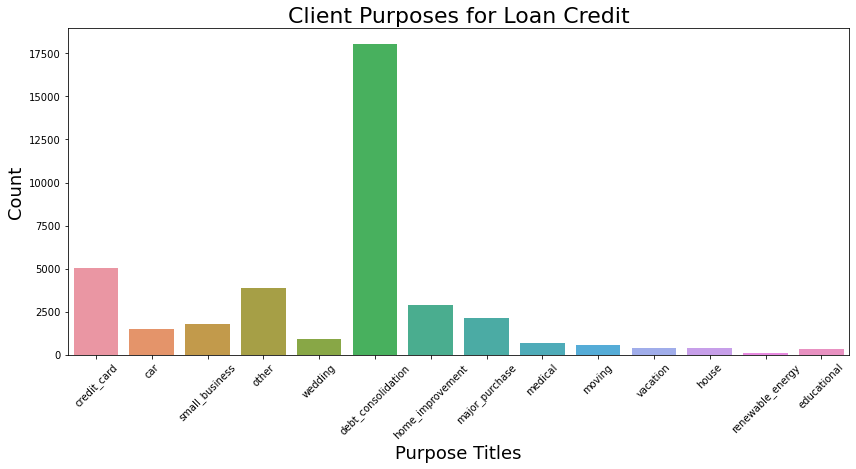

In [245]:
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=loan_Verify)
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
plt.xticks(rotation = 45)
g.set_ylabel('Count', fontsize=18)

Text(0, 0.5, 'Count')

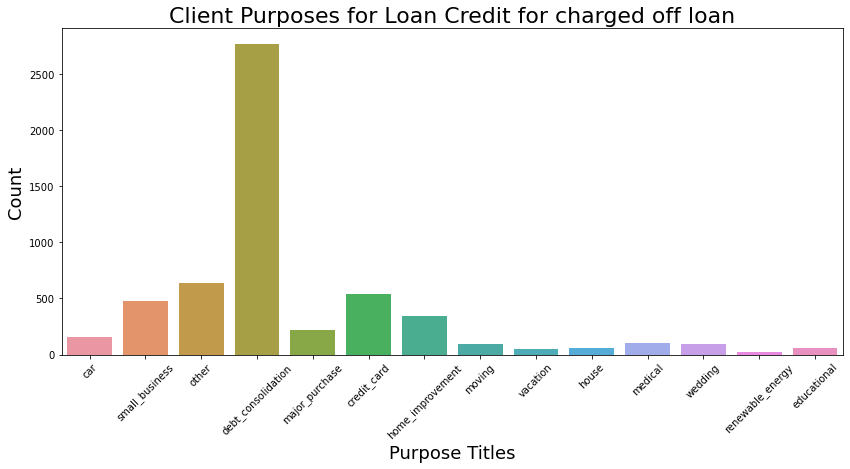

In [246]:
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=ChargedOff_Loan)
g.set_title("Client Purposes for Loan Credit for charged off loan", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
plt.xticks(rotation = 45)
g.set_ylabel('Count', fontsize=18)

In [247]:
(loan_Verify.purpose.value_counts(normalize=True)* 100).head(3)

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
Name: purpose, dtype: float64

In [248]:
(ChargedOff_Loan.purpose.value_counts(normalize=True)* 100).head(3)

debt_consolidation    49.173627
other                 11.249334
credit_card            9.632131
Name: purpose, dtype: float64

#### The Top3 purpose for the loan is in debt_consolidation, credit_card and other ranging upto 60% of total charged off loan

In [249]:
df_plot = loan_Verify.groupby(['loan_status', 'purpose']).size().reset_index().pivot(columns='loan_status', index='purpose', values=0)
df_plot

loan_status,Charged Off,Fully Paid
purpose,,
car,160,1339
credit_card,542,4485
debt_consolidation,2767,15288
educational,56,269
home_improvement,347,2528
house,59,308
major_purchase,222,1928
medical,106,575
moving,92,484


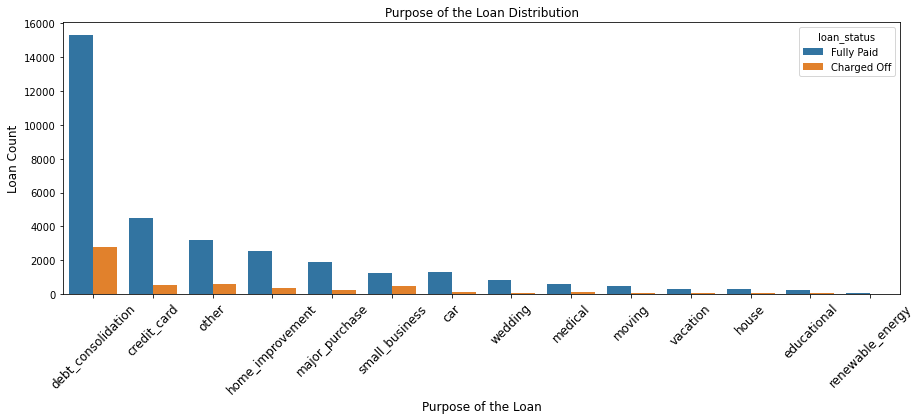

In [250]:
plt.figure(figsize=(15,5))
p1 = sns.countplot(data=loan_Verify,x='purpose',hue=('loan_status'),order=loan_Verify['purpose'].value_counts().index)
plt.xticks(size=12, rotation=45)
plt.xlabel('Purpose of the Loan', size=12)
plt.ylabel('Loan Count', size=12)
plt.title('Purpose of the Loan Distribution')
plt.show()
for p in p1.patches:
        p1.annotate('{:.2f}'.format(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [251]:
loan_Verify.groupby(['grade'])['loan_status'].value_counts()

grade  loan_status
A      Fully Paid      9443
       Charged Off      602
B      Fully Paid     10250
       Charged Off     1425
C      Fully Paid      6487
       Charged Off     1347
D      Fully Paid      3967
       Charged Off     1118
E      Fully Paid      1948
       Charged Off      715
F      Fully Paid       657
       Charged Off      319
G      Fully Paid       198
       Charged Off      101
Name: loan_status, dtype: int64

In [252]:
### Calculating the grade wise data grouping and calculating the % value for both charged off and Fully Paid loans
### Assigning it to the loanStatus_grade dataframe
loanStatus_grade = pd.pivot_table(data=loan_Verify, index='grade', columns='loan_status', values='loan_amnt', 
               aggfunc="count")
loanStatus_grade['TotalperYear']= loanStatus_grade['Charged Off']+loanStatus_grade['Fully Paid']
loanStatus_grade['%Charged Off'] = loanStatus_grade['Charged Off']/loanStatus_grade['TotalperYear']*100
loanStatus_grade['%FullyPaid'] = loanStatus_grade['Fully Paid']/loanStatus_grade['TotalperYear']*100
loanStatus_grade.head(7)

loan_status,Charged Off,Fully Paid,TotalperYear,%Charged Off,%FullyPaid
grade,,,,,
A,602,9443,10045,5.993031,94.006969
B,1425,10250,11675,12.205567,87.794433
C,1347,6487,7834,17.194281,82.805719
D,1118,3967,5085,21.986234,78.013766
E,715,1948,2663,26.849418,73.150582
F,319,657,976,32.684426,67.315574
G,101,198,299,33.779264,66.220736


<Figure size 864x864 with 0 Axes>

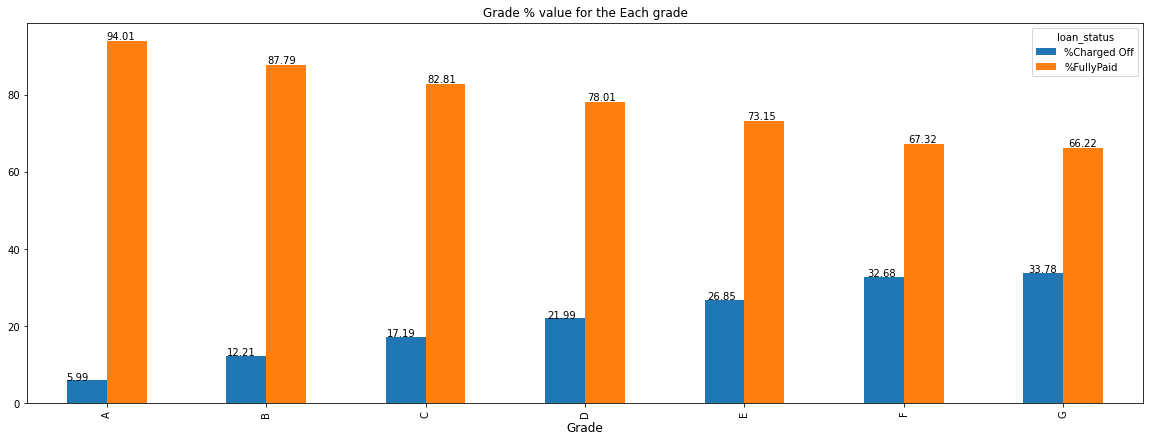

In [253]:
plt.figure(figsize=(12,12))

graph = loanStatus_grade[['%Charged Off','%FullyPaid']].plot(kind="bar",figsize=[20,7])
plt.xlabel('Grade', size=12)
plt.title('Grade % value for the Each grade')
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#### As we can see charged off loans are increasing with higher interest rates(as summarized by grades)

In [254]:
numericals_clusters = ['loan_amnt', 'annual_inc', 'dti','loan_status','installment', 'int_rate']

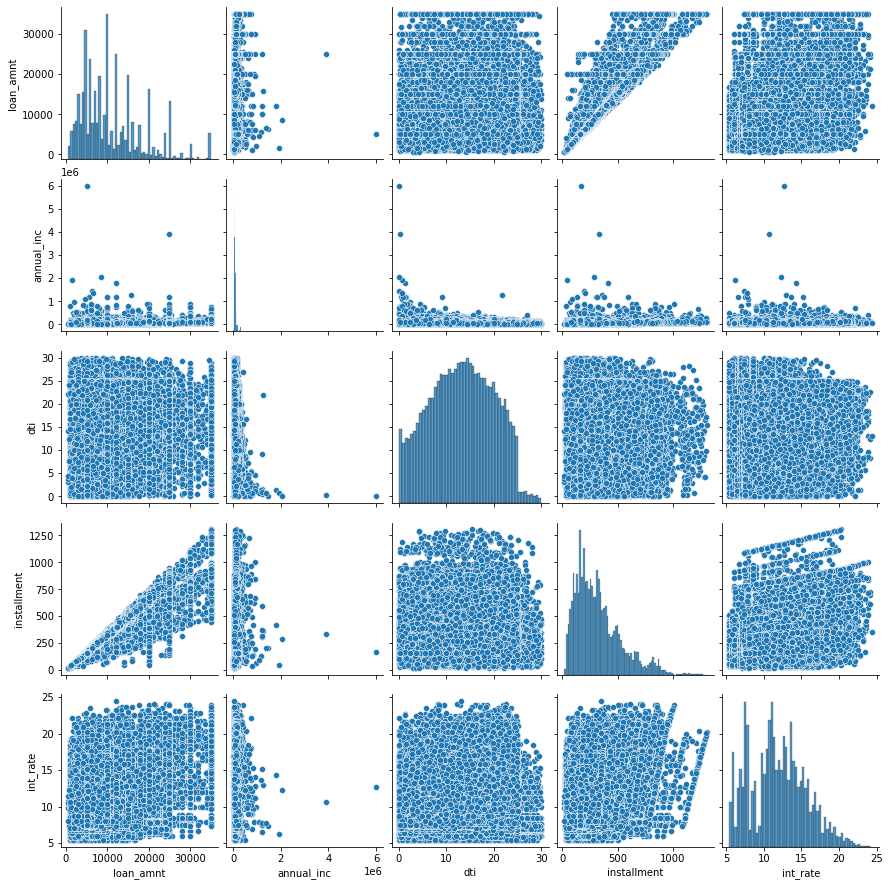

In [255]:
sns.pairplot(loan_Verify[numericals_clusters])

In [256]:
### Understanding the DTI value with the Purpose and the Loan status data
pd.pivot_table(loan_Verify,values='dti', columns='purpose',index='loan_status',aggfunc=np.mean)


purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,11.861187,15.419982,15.144290,11.049821,12.099683,11.252373,11.646441,12.220755,12.402500,13.210079,13.273158,11.763453,13.894528,12.295938
Fully Paid,10.991187,14.461369,14.298743,11.238736,10.984786,10.445649,10.668605,12.192696,11.525992,12.049010,11.836747,10.847733,11.973478,12.339542


<AxesSubplot:xlabel='loan_status'>

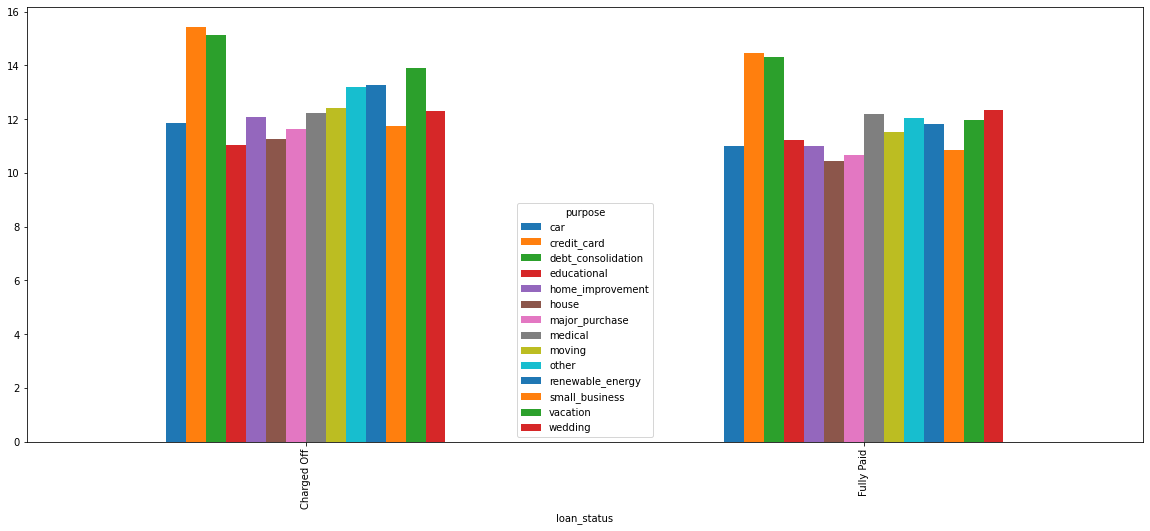

In [257]:
pd.pivot_table(loan_Verify,values='dti', columns='purpose',index='loan_status',aggfunc=np.mean).plot(kind='bar', figsize=[20,8])

##### The dti values are more for the Charged Off loans under most of the purposes listed

In [258]:
loan_Verify['int_bucket']=pd.qcut(loan_Verify.int_rate,5,['VL','L','M','H','VH'])
pd.pivot_table(data=loan_Verify, index='loan_status', columns="int_bucket", values="annual_inc", aggfunc=np.median)

int_bucket,VL,L,M,H,VH
loan_status,,,,,
Charged Off,45600.0,50000.0,50000.0,50000.0,60000.0
Fully Paid,60000.0,56700.0,60000.0,58000.0,65000.0


<AxesSubplot:xlabel='int_bucket', ylabel='loan_status'>

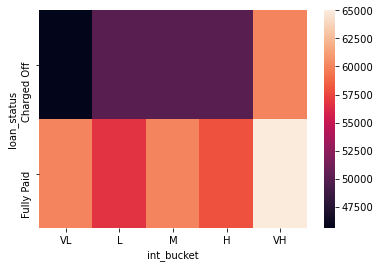

In [259]:
sns.heatmap(pd.pivot_table(data=loan_Verify, index='loan_status', columns="int_bucket", values="annual_inc", aggfunc=np.median))

<AxesSubplot:xlabel='int_bucket', ylabel='loan_status'>

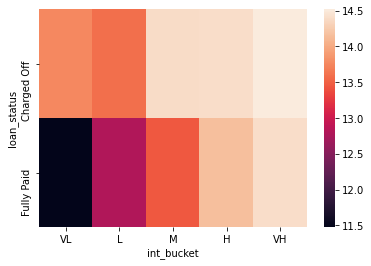

In [260]:
sns.heatmap(pd.pivot_table(data=loan_Verify, index='loan_status', columns="int_bucket", values="dti", aggfunc=np.median))